***Welcome to Cowcooloose***,

Here we will learn how cows are cool and often loosely correlated to math.
```
                                       /;    ;\
                                   __  \____//
                                  /{_\_/   `'\____
                                  \___ ---(=)--(=)--}
       _____________________________/          :--'
   ,-,'`@@@@@@@@       @@@@@@         \_    `__\
  ;:(  @@@@@@@@@        @@@             \___(o'o)
  :: )  @@@@          @@@@@@        ,'@@(  `===='
  :: : @@@@@:          @@@@         `@@@:
  :: \  @@@@@:       @@@@@@@)    (  '@@@'
  ;; /\      /`,    @@@@@@@@@\\   :@@@@@)
  ::/  )    {_----------------:  :~`, ;
 ;;'`; :   )                  :  / `; ;
;;;; : :   ;                  :  ;  ; :
`'`' / :  :                   :  :  : :
    )_ \__;      ";"          :_ ;  \_\       `,','
    :__\  \    * `,'*         \  \  :  \   *  8`;'*  *
        `^'     \ :/           `^'  `-^-'   \v/ :  \/   -Bill Ames-     
```

A cow walks 3.2 miles in 1.5 hours, hungry for the patch of grass ahead
What is the speed of the cow in "mi/h"?

Cows like imperial units btw... Weirdos...

In [5]:
''' since dist = 3.2, and time = 1.5, and speed = distance / time '''

dist = 3.2
time = 1.5

speed = dist / time

print('The cow walks at', speed, 'mi per hour')

The cow walks at 2.1333333333333333 mi per hour


----
----
Now, what if as the cow walked, she *accelerated* (she's in a rush you see).


If she sped up 1.2 mi per hour per hour, how fast is she going in 2 hrs?

In [6]:
accel = 1.2  # mi/hr per hr
time  = 2.0

speed = speed + accel * time  # mi/hr + (mi/hr)/hr * hr

print('The cow walks at', speed, 'mi per hour after', time, 'hours')

The cow walks at 4.533333333333333 mi per hour after 2.0 hours


Now, more realistically, the cow will *oscillate* in speed...

Let's use sine ```y = sin(x)``` to model how she changes speed...

**So, let's try**    ```speed = 2 * sin(time / 2) + 2```

**IMPORTANT** Change of units for time, let time be in MINUTES

*... What does that look like on a graph?*

In [3]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

time = sympy.symbols('time')
speed = 2 * sympy.sin( (time / 2)*(time / 60)  ) + 2

# lamdify() is a great function.
# It turns sympy "symbolic" functions into real ones that can be USED!
speed_numpy = sympy.lambdify( time,  # speed(time)
                              speed, # speed function (symbolic)
                  modules=['numpy']  # use numpy's functions to make it real
                )

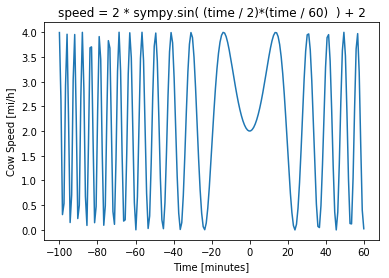

In [9]:
time_walking = 60.0 # spend 60 minutes walking
times = np.linspace(0,  time_walking, 200) # make 100 points between 0 and 60 min
speeds = speed_numpy(times) # make 100 speeds at each time in times

plt.plot(times, speeds)
plt.title("speed = 2 * sympy.sin( (time / 2)*(time / 60)  ) + 2")
plt.xlabel("Time [minutes]")
plt.ylabel("Cow Speed [mi/h]")
plt.show()

# 

A trickier one now... 

**How FAR does she walk in 60 minutes at this
alternating speed?**

*This is impossible to get perfect without calculus btw...*

----
----

**To do this, basically we do this:**

Figure out the **Integral of Speed between time = 0 and time = 60**

- *What does that mean?*

In a nutshell it means to do this:

- for a ton of tiny slices of time (like really small, seriously):
    get the speed value at the start of that time slice


- take the `speed * the width of the time slice`
    (essentially get the area of the rectangle...
    (see whiteboard explanation for details))


- add that `speed*timewidth` to a running total of areas


- at the end, the **total area gathered** will be the amount of **distance covered in that time**...

**Isn't that kind of crazy?**

----

None of that actually matters, in practice, though.

All you have to do is this: 

In [12]:
# Remember, we already defined speed and time up above when we plotted
distance = sympy.integrate(speed, (time, 0, time_walking) )

# Evaluate result into a float (decimal number)
distance_walked = distance.evalf()

In [13]:
print('The cow walks a grand total of', distance_walked, 'miles in',
                                        time_walking, 'minutes')

print("That's a fast cow!")

print("The cow's distance function is:", sympy.integrate(speed, time))

The cow walks a grand total of 347.273352127154 miles in 60.0 minutes
That's a fast cow!
The cow's distance function is: 2*time + 3*sqrt(15)*sqrt(pi)*fresnels(sqrt(15)*time/(30*sqrt(pi)))*gamma(3/4)/gamma(7/4)
